In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [176]:
conn = sqlite3.connect("../db.sqlite3")

query_product = "SELECT * FROM restaurant_product"
query_order = "SELECT * FROM restaurant_order"
query_order_item = "SELECT * FROM restaurant_orderitem"

df_product = pd.read_sql_query(query_product, conn)
df_order = pd.read_sql_query(query_order, conn)
df_order_item = pd.read_sql_query(query_order_item, conn)

merged_df = df_order_item.merge(df_order, on="id", how="left")
merged_df = merged_df.merge(
    df_product, left_on="product_id", right_on="id", how="left"
)

merged_df.drop(["id_y", "product_id"], axis=1, inplace=True)
merged_df.rename(columns={"id_x": "id"}, inplace=True)
final_df = merged_df[[
    "id", "order_id", "name", "price", "quantity", "datetime"
]]

final_df.to_csv("output.csv", index=False)

conn.close()

df = pd.read_csv("output.csv")
df.head()

,id,order_id,name,price,quantity,datetime
0,1,1,Plain Papadum,0.80,2,2019-08-03 20:25:00
1,2,1,King Prawn Balti,12.95,1,2019-08-03 20:17:00
2,3,1,Garlic Naan,2.95,1,2019-08-03 20:09:00
3,4,1,Mushroom Rice,3.95,1,2019-08-03 20:01:00
4,5,1,Paneer Tikka Masala,8.95,1,2019-08-03 19:44:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

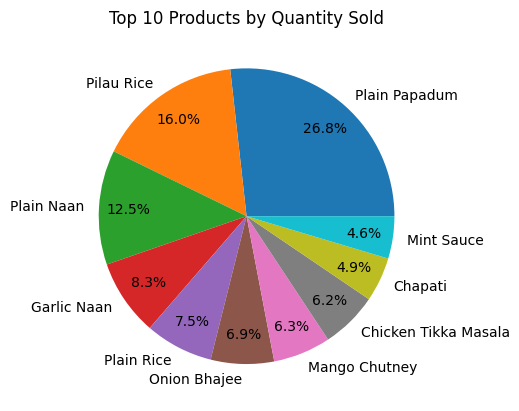

In [182]:
total_quantity_per_product = df.groupby("name")["quantity"].sum()
total_quantity_per_product.sort_values(ascending=False, inplace=True)
top_10 = total_quantity_per_product[:10]

labels = top_10.index
sizes = top_10.values
_, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", pctdistance=0.8)
ax.set_title("Top 10 Products by Quantity Sold")
plt.show()


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

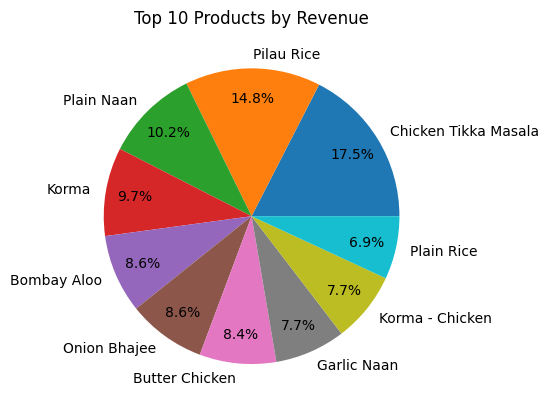

In [183]:
total_revenue_per_product = df.groupby("name").apply(
    lambda x: (x["quantity"] * x["price"]).sum(), include_groups=False 
)
total_revenue_per_product.sort_values(ascending=False, inplace=True)
top_10_revenue = total_revenue_per_product[:10]

labels = top_10_revenue.index
sizes = top_10_revenue.values
_, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", pctdistance=0.8)
ax.set_title("Top 10 Products by Revenue")
plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

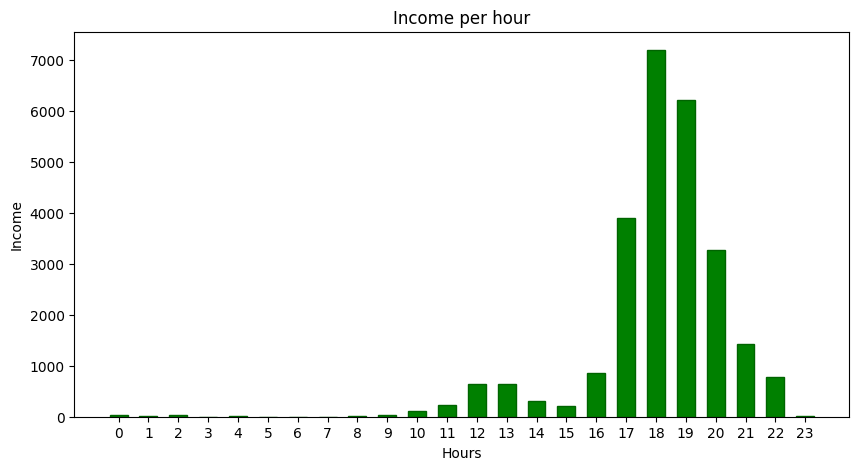

In [179]:
datetime_converted = pd.to_datetime(df["datetime"])
df["hour"] = datetime_converted.dt.hour
total_revenue_per_hour = df.groupby("hour").apply(
    lambda x: (x["quantity"] * x["price"]).sum(), include_groups=False 
).reindex(range(24), fill_value=0)

order_hours = np.arange(24)
income = total_revenue_per_hour
 
_, ax2 = plt.subplots(figsize=(10, 5))

ax2.bar(
    order_hours, income, color="green", width=0.6, edgecolor="darkgreen"
)

ax2.set_xlabel("Hours")
ax2.set_ylabel("Income")
ax2.set_xticks(order_hours)
ax2.set_title("Income per hour")

plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

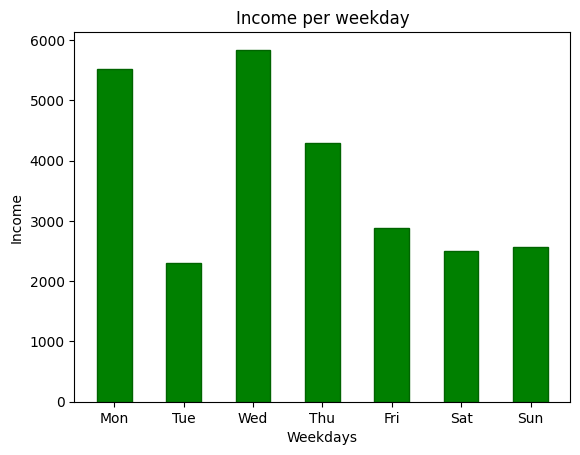

In [180]:
df["weekday"] = datetime_converted.dt.day_name()
total_revenue_per_weekday = df.groupby("weekday").apply(
    lambda x: (x["quantity"] * x["price"]).sum(), include_groups=False 
)

weekdays = ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")
income = total_revenue_per_weekday
 
_, ax3 = plt.subplots()

ax3.bar(weekdays, income, color="green", width=0.5, edgecolor="darkgreen")

ax3.set_xlabel("Weekdays")
ax3.set_ylabel("Income")
ax3.set_xticks(weekdays)
ax3.set_title("Income per weekday")

plt.show()